# Nbextension 설치

In [1]:
pip install jupyter_contrib_nbextensions

  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428786 sha256=999eacd71b0c73c3952e1a5a1a24cdb2456b09973dd3b9304416d618edbf031d
  Stored in directory: c:\users\haeunseo\appdata\local\pip\cache\wheels\9c\57\38\7b0046dbc034aa0b2a5af0a26b60c08030f3ede6ca9cf568fa
  Created wheel for jupyter-contrib-core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17476 sha256=400652263077b81d7bb6017735b2551b82410314e33eb2612f0ae02ec0381d33
  Stored in directory: c:\users\haeunseo\appdata\local\pip\cache\wheels\79\cf\67\d2c1aab9313f1ac5f23e30485ff8cccbb062b3a77c00df2b2d
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.6.1-py2.py3-none-any.whl size=466831 sha256=f2705b98ee39ff35745b69e421d744e88edb2ebf9c169490424e6fe82c82157b
  Stored in directory: c:\users\haeunseo\appdata\local\pip\cache\wheels\91\8d\53\f3571c96e3242386896bf880150c3e69e4fc2ea6263af2427d
Successfully

ERROR: spyder 4.0.1 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 4.0.1 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: nbformat 5.7.3 has requirement traitlets>=5.1, but you'll have traitlets 4.3.3 which is incompatible.
ERROR: nbconvert 7.2.9 has requirement jupyter-core>=4.7, but you'll have jupyter-core 4.6.1 which is incompatible.
ERROR: nbconvert 7.2.9 has requirement traitlets>=5.0, but you'll have traitlets 4.3.3 which is incompatible.
ERROR: nbclient 0.7.2 has requirement jupyter-client>=6.1.12, but you'll have jupyter-client 5.3.4 which is incompatible.
ERROR: nbclient 0.7.2 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.1 which is incompatible.
ERROR: nbclient 0.7.2 has requirement traitlets>=5.3, but you'll 

# 1. 전국 신규 민간 아파트 분양가격 동향

In [2]:
import pandas as pd

In [3]:
df_last = pd.read_csv('주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding = "CP949")
df_last.shape


#UnicodeDecodeError -> 한글깨짐 -->  encoding = "euc-kr" OR "cp949"

(4335, 5)

In [4]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


## 2015년부터 최근까지의 데이터 로드
2013년 9월부터 2015년 8월까지 파일을 불러옴

In [6]:
df_first = pd.read_csv('전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.shape

(17, 22)

In [7]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


## 데이터 요약하기

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


## 결측치 제거하기  --> isna(), isnull() 
결측치는 True로 표시되는데, True == 1이기 때문에 이 값을 더 더해주면 결측치의 수가 된다.

In [10]:
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [11]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [12]:
df_last.isna()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [13]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

## 데이터 타입 변경
문자열 타입은 계산할 수 없기 때문에 수치 데이터로 변경해야 한다. \
결측치가 섞여 있을 때 변환이 제대로 되지 않는다. 그래서 pd.to_numeric 을 통해 데이터 타입 변경!

In [14]:
df_last['분양가격(㎡)']  #숫자 데이터인데 object로 되어있음 -> 연산불가

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4330    3882
4331     NaN
4332    3898
4333     NaN
4334    3601
Name: 분양가격(㎡), Length: 4335, dtype: object

In [16]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'] , errors = 'coerce')
df_last['분양가격'].head(1)

0    5841.0
Name: 분양가격, dtype: float64

## 평당분양가격 구하기
분양가격을 평당기준으로 보기 위해 3.3을 곱해서 '평당분양가격' 칼럼을 추가

In [18]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


## 분양가격 요약하기

In [19]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [25]:
# 변경 전 컬럼인 분양가격(㎡) 칼럼 요약 --> object 타입
# count가 다른 이유는 공백문자도 포함시켜서
# top -> 가장 빈번하게 등장하고 있는 문자
# freq -> 가장 빈번하게 등장하고 있는 문자의 횟수 ( top 횟수 )

df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [21]:
# 수치데이터로 변경된 분양가격 칼럼 요약 --> float타입

df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

## 규모구분을 전용면적 컬럼으로 변경
str의 replace 기능을 사용

In [26]:
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [38]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [34]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과','~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하','')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ','').str.strip()  #앞 뒤 공백도 제거
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [40]:
# drop 사용시 axis에 유의하기!
# axis 0:행, 1:열

df_last = df_last.drop(['규모구분','분양가격(㎡)'], axis=1)

In [42]:
# 칼럼 제거로 메모리 용량이 줄어 들었음
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


## groupby 데이터 집계하기
df.groupby(['인덱스로 사용할 칼럼명'])['계산할 칼럼명'].연산()

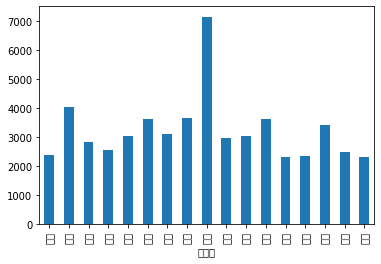

In [45]:
# 지역명으로 분양가격 평균 구하고 막대그래프로 시각화

df_last.groupby(['지역명'])['분양가격'].mean().plot.bar();

In [47]:
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()

지역명  전용면적    
강원   102㎡~       8311.380000
     60㎡         7567.098000
     60㎡~85㎡     7485.588000
     85㎡~102㎡    8749.557143
     전체          7477.536000
                    ...     
충북   102㎡~       8195.352000
     60㎡         7103.118000
     60㎡~85㎡     7264.488000
     85㎡~102㎡    8391.306000
     전체          7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [49]:
# unstack()  --> dataframe형태로 보여줌
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [50]:
# .T --> 행 열 치환
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round().T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


## groupby와 pivot table 차이점
groupby은 Series 형태로 출력, 연산의결과가 빠르다! \
pivot table은 DataFrame형태로 출력, 명시적으로 그룹화하는 값드을 지정

In [55]:
pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc = 'mean')

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [57]:
# df_last.groupby(['전용면적'])['평당분양가격'].mean()
# aggfunc의 defalut  --> mean()
pd.pivot_table(df_last, index="전용면적", values='평당분양가격')

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [61]:
# 지역명, 전용면적으로 평당분양가격의 평균 구하기

df_last.groupby(['전용면적','지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [62]:
df_last.pivot_table(index = ['전용면적', '지역명'], values = '평당분양가격')

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [64]:
# groupby와 결과창이 다르기 때문에
df_last.pivot_table(index = '전용면적', columns = '지역명', values = '평당분양가격').round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


### pivot과 pivot_ table의 차이점
aggfunc의 여부

# 최근 데이터 시각화하기

#### 데이터 시각화를 위한 폰트설정

In [65]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


- pandas로 시각화하기

C:\Users\HAEUNSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HAEUNSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HAEUNSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HAEUNSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HAEUNSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HAEUNSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51

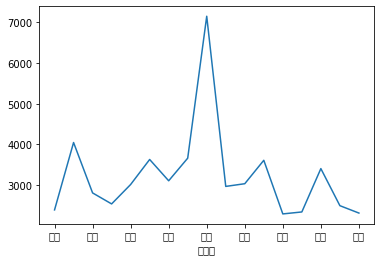

In [67]:
# 지역명으로 분양가격 평균 구하고 선그래프로 시각화

df_last.groupby(['지역명'])['분양가격'].mean().plot();

In [68]:
# missing from current font --> 오류발생

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')

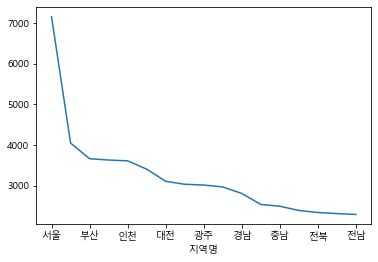

In [82]:
g = df_last.groupby(['지역명'])['분양가격'].mean().sort_values(ascending = False)
g.plot();

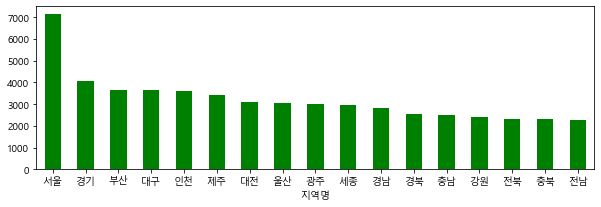

In [83]:
g.plot.bar(rot=0, figsize = (10,3), color = 'g');

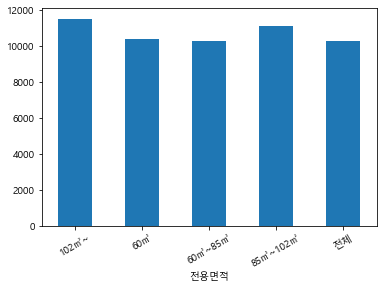

In [87]:
df_last.groupby(['전용면적'])['평당분양가격'].mean().plot.bar(rot=30)

# box plot

- 가공하지 않은 자료를 그대로 이용하는 것이 아니라, 자료로부터 어덩낸 통계량인 5가지 요약 수치로 그림
- 5가지 요약 수치란? \
: 기술통계학에서 자료의 정보를 알려주는 5가지 수치를 의미

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수 (=중앙값)
4. 제 3사분위수
5. 최댓값

+ 사분위수 범위 (IQR)  = Q3-Q1

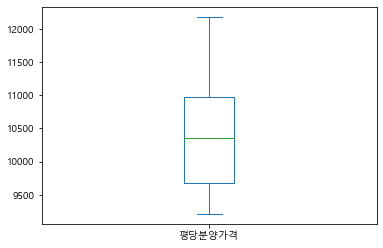

In [89]:
df_last.pivot_table(index = '연도', values = '평당분양가격').plot.box();

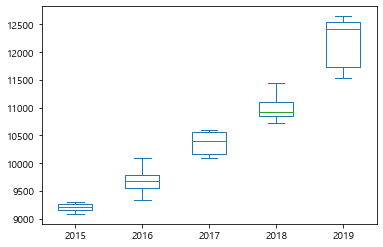

In [91]:
# x축에 연도 표시

df_last.pivot_table(index = '월' , columns = '연도', values = '평당분양가격').plot.box();

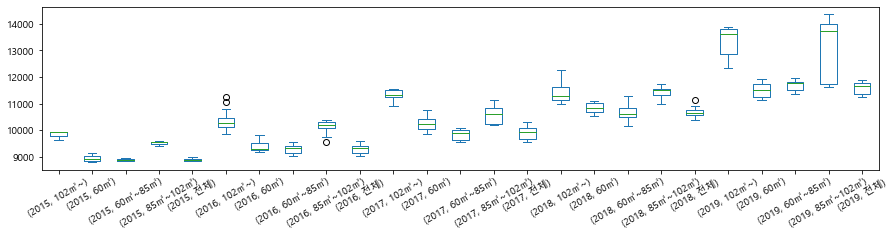

In [96]:
p = df_last.pivot_table(index = '월' , columns = ['연도', '전용면적'], values = '평당분양가격')
p.plot.box(rot =30 , figsize=(15,3));

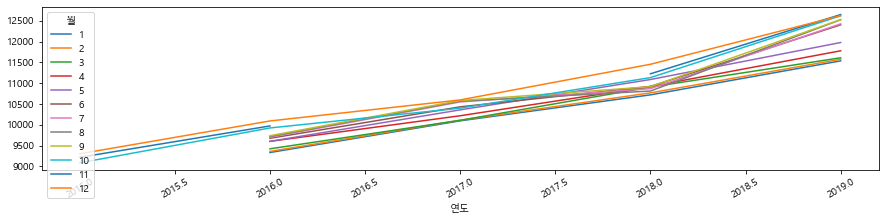

In [99]:
p = df_last.pivot_table(index = '연도' , columns = ['월'], values = '평당분양가격')
p.plot(rot =30 , figsize=(15,3));

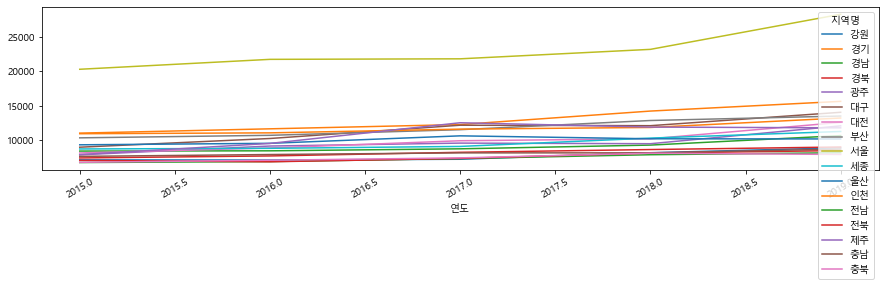

In [100]:
p = df_last.pivot_table(index = '연도' , columns = ['지역명'], values = '평당분양가격')
p.plot(rot =30 , figsize=(15,3));